1) A continuación se obtienen los datos experimentales de Z, N, A y BE, sus gráficas y los resultados obtenidos del modelo de la gota líquida con los parámetros entregados

In [ ]:
#se importan las librerias necesarias
#todo el tratamiento de datos se realiza con la libreria pandas

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#se cargan los datos experimentales y se les da un nombre adecuado
df = pd.read_table("mymass20.dat", sep="\s+")
cols=['N', 'Z', 'A', 'NAN', 'NAN1', 'BE/A', 'NAN2', 'Masa', 'NAN4']
df.columns = cols



In [ ]:
#se imprimen los datos exprimentales
df

,N,Z,A,NAN,NAN1,BE/A,NAN2,Masa,NAN4
0,0,1,1,7288.971064,0.000013,0.00000,0.00000,1.007825e+06,0.000014
1,1,1,2,13135.722895,0.000015,1112.28310,0.00020,2.014102e+06,0.000015
2,2,1,3,14949.810900,0.000080,2827.26540,0.00036,3.016049e+06,0.000080
3,1,2,3,14931.218880,0.000060,2572.68044,0.00015,3.016029e+06,0.000060
4,0,3,3,28667.000000,2000.000000,-2267.00000,667.00000,3.030775e+06,2147.000000
...,...,...,...,...,...,...,...,...,...
3552,176,117,293,194428.000000,778.000000,7095.00000,3.00000,2.932087e+08,835.000000
3553,175,118,293,198802.000000,709.000000,7078.00000,2.00000,2.932134e+08,761.000000
3554,177,117,294,196397.000000,593.000000,7092.00000,2.00000,2.942108e+08,637.000000
3555,176,118,294,199320.000000,553.000000,7079.00000,2.00000,2.942140e+08,594.000000


In [ ]:
#se separan los datos experimentales por tipo
A = df['A']
N = df['N']
Z = df['Z']
B = df['BE/A'] / 1000 #pasamos a MeV


In [ ]:
#Calculamos BE con el modelo de la gota líquida visto en clase

def BE(N, Z):
    alpha1 = 15.48   # MeV
    alpha2 = 17.23   # MeV
    alpha3 = 0.697   # MeV
    alpha4 = 22.6    # MeV
    f = alpha1 * A - alpha2 * A ** (2/3) -alpha3 * Z ** 2 / A ** (1/3) - alpha4 * (N - Z) ** 2 / A
    return f

In [ ]:
#renombramos BE para los valores N y Z
g1 = BE(N, Z)

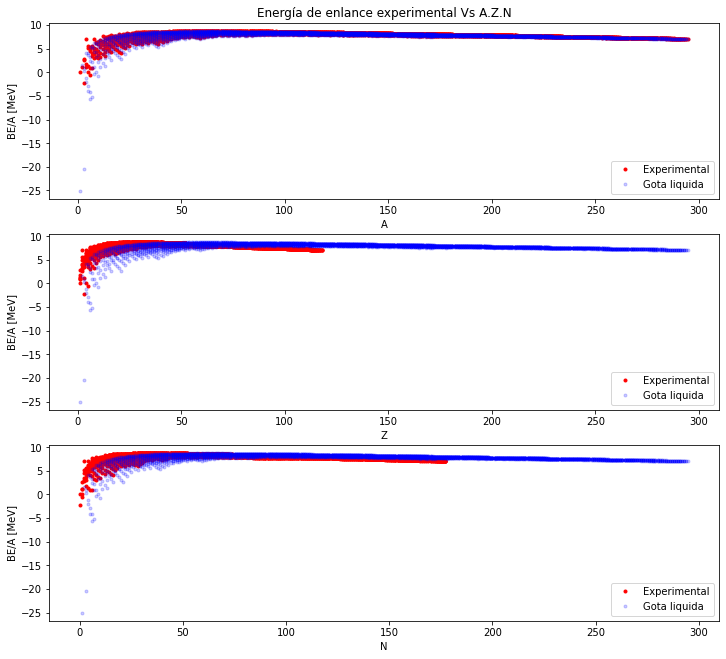

In [ ]:
f = plt.figure(figsize=(12, 11))
# plt.title("Energía de enlance experimental Vs A.Z.N")

ax1 = f.add_subplot(3, 1, 1)
ax2 = f.add_subplot(3, 1, 2)
ax3 = f.add_subplot(3, 1, 3)

ax1.plot(A, B, '.', c='red', label = 'Experimental')
ax1.plot(A, g1/A, '.', c='blue', alpha=0.2, label = 'Gota liquida')
ax1.set_xlabel("A")
ax1.set_ylabel("BE/A [MeV]")
ax1.set_title("Energía de enlance experimental Vs A.Z.N")
ax1.legend()

ax2.plot(Z, B, '.', c='red', label = 'Experimental')
ax2.plot(A, g1/A, '.', c='blue', alpha=0.2, label = 'Gota liquida')
ax2.set_xlabel("Z")
ax2.set_ylabel("BE/A [MeV]")
ax2.legend()

ax3.plot(N, B, '.', c='red', label = 'Experimental')
ax3.plot(A, g1/A, '.', c='blue', alpha=0.2, label = 'Gota liquida')
ax3.set_xlabel("N")
ax3.set_ylabel("BE/A [MeV]")
ax3.legend()


Ahora se calcula BE con el modelo de la gota líquida, haciendo los $\alpha _ {i} = 0$ en cada caso. Vamos disminiyendo en orden con cada función $BE_{i}$ definida

In [ ]:
def BE4(N, Z):
    alpha1 = 15.48   # MeV
    alpha2 = 17.23   # MeV
    alpha3 = 0.697   # MeV
    alpha4 = 0    # MeV
    f = alpha1 * A - alpha2 * A ** (2/3) -alpha3 * Z ** 2 / A ** (1/3) - alpha4 * (N - Z) ** 2 / A
    return f

def BE3(N, Z):
    alpha1 = 15.48   # MeV
    alpha2 = 17.23   # MeV
    alpha3 = 0  # MeV
    alpha4 = 0    # MeV
    f = alpha1 * A - alpha2 * A ** (2/3) -alpha3 * Z ** 2 / A ** (1/3) - alpha4 * (N - Z) ** 2 / A
    return f

def BE2(N, Z):
    alpha1 = 15.48   # MeV
    alpha2 = 0  # MeV
    alpha3 = 0  # MeV
    alpha4 = 0    # MeV
    f = alpha1 * A - alpha2 * A ** (2/3) -alpha3 * Z ** 2 / A ** (1/3) - alpha4 * (N - Z) ** 2 / A
    return f

def BE1(N, Z):
    alpha1 = 0   # MeV
    alpha2 = 0  # MeV
    alpha3 = 0  # MeV
    alpha4 = 0    # MeV
    f = alpha1 * A - alpha2 * A ** (2/3) -alpha3 * Z ** 2 / A ** (1/3) - alpha4 * (N - Z) ** 2 / A
    return f

In [ ]:
#definimos nuevos arreglos de datos para cada caso
d4 = BE4(N, Z) / A
d3 = BE3(N, Z) / A
d2 = BE2(N, Z) / A
d1 = BE1(N, Z) / A

Graficamos para observar cómo cambia el modelo cuando disminuimos el orden de la expansión

Text(0.5, 1.0, 'Energía de enlance experimental Vs A.Z.N')

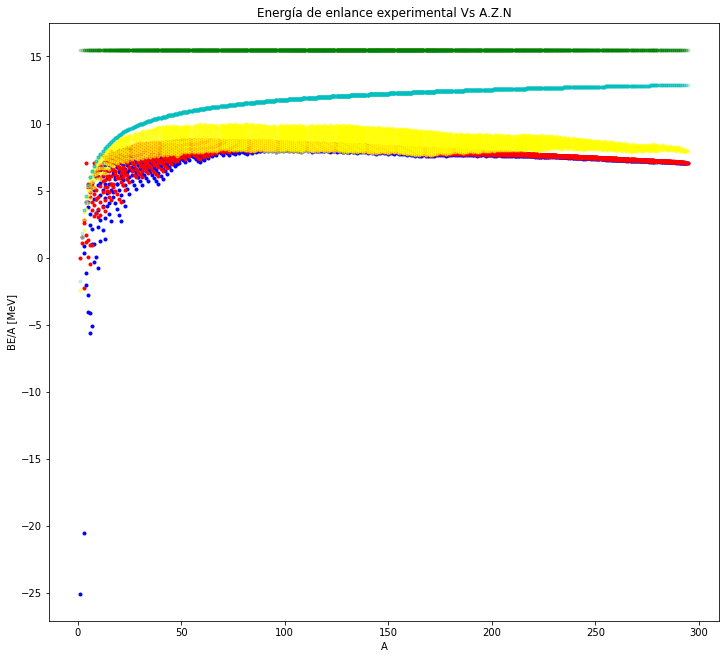

In [ ]:
f = plt.figure(figsize=(12, 11))
# plt.title("Energía de enlance experimental Vs A.Z.N")

ax1 = f.add_subplot(1, 1, 1)

ax1.plot(A, g1/A, '.', c='blue')
ax1.plot(A, B, '.', c='red')
ax1.plot(A, d4, '.', c='yellow', alpha=0.5)
ax1.plot(A, d3, '.', c='c', alpha=0.2)
ax1.plot(A, d2, '.', c='green', alpha=0.2)


ax1.set_xlabel("A")
ax1.set_ylabel("BE/A [MeV]")
ax1.set_title("Energía de enlance experimental Vs A.Z.N")

Observamos que obtenemos una gráfica similar a la de la fig 2 entregada en el planteamiento del ejercicio

2) Considerando la ecuación de masa isobárica $$M(Z,A)c^{2} = \alpha + \beta Z + \gamma Z^{2} - \delta (A) $$

Ahora separamos los datos que tienen A = 131 en común en otro dataframe

In [ ]:
df[df['A']==131]

,N,Z,A,NAN,NAN1,BE/A,NAN2,Masa,NAN4
1626,85,46,131,-25740.00000,300.00000,7993.0000,2.0000,1.309724e+08,322.00000
1627,84,47,131,-40750.00000,500.00000,8102.0000,4.0000,1.309563e+08,537.00000
1628,83,48,131,-55211.76000,19.23800,8206.1204,0.1469,1.309407e+08,20.65300
1629,82,49,131,-68024.36900,2.20500,8297.9544,0.0168,1.309270e+08,2.36700
1630,81,50,131,-77264.57900,3.62100,8362.5183,0.0276,1.309171e+08,3.88700
1631,80,51,131,-81981.41200,2.08400,8392.5525,0.0159,1.309120e+08,2.23600
1632,79,52,131,-85211.02200,0.06100,8411.2339,0.0005,1.309085e+08,0.06500
1633,78,53,131,-87442.72700,0.60500,8422.2977,0.0046,1.309061e+08,0.64900
1634,77,54,131,-88413.57492,0.00512,8423.7367,0.0003,1.309051e+08,0.00549
1635,76,55,131,-88055.57400,0.17700,8415.0317,0.0014,1.309055e+08,0.19000


Y separamos los elementos que cumplan con A = 131 y Z = 52, 54, 56 respectivamente

In [ ]:
#calculamos los valores con los cuales haremos el ajuste o fiteo
c = 931
me = df[df['A']==131]
m1 = me[me['Z'] == 52]['Masa']*1e-6
x1 = float(me[me['Z'] == 52]['Z'])
m1 = float(m1)

m2 = me[me['Z'] == 54]['Masa']*1e-6
x2 = float(me[me['Z'] == 54]['Z'])
m2 = float(m2)
x2

m3 = me[me['Z'] == 56]['Masa']*1e-6
x3 = 56.0
m3 = float(m3)
m3

y1 = m1 * c ** 2
y2 = m2 * c ** 2
y3 = m3 * c ** 2

In [ ]:
zz = me['Z']
mm = me['Masa']*1e-6

In [ ]:
#se define la funcion de masa isobarica
def fun(zz, a, b, g):
    f = a + b * zz + g * zz ** 2
    return f

In [ ]:
# importamos la libreria que permite hacer el fiteo
from scipy.optimize import curve_fit


2.1) Cálculo de los parámetros

In [ ]:
#calculamos los parametros de ajuste (alpha, beta, gamma)
popt, _ = curve_fit(fun, zz, mm)
a, b, c = popt
popt


array([ 1.33404819e+02, -9.13667234e-02,  8.34361899e-04])

2.2) Graficación de la parábola de masas

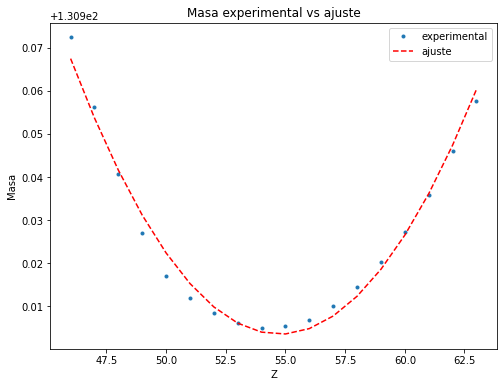

In [ ]:
#graficamos los datos experimentales de A vs el ajuste obtenido
#con los parametros hallados


f = plt.figure(figsize=(8, 6))
ax1 = f.add_subplot(1, 1, 1)

ax1.set_title('Masa experimental vs ajuste')
ax1.set_ylabel('Masa')
ax1.set_xlabel('Z')
ax1.plot(zz, mm, '.',label='experimental')
y = fun(zz, a,b,c)

ax1.plot(zz, y, '--', c='red',label='ajuste')
ax1.legend()

2.3) Gráfica del $Q_{\beta}$ para el decaimiento $\beta _{-}$ Vs Z



De la teoría sabemos que, en general: $$\frac{Q_{\beta}}{c^{2}} = M(Z,A) - M(Z+1, A)$$
Luego, reemplazando los valores desde la aproximación de masa isobárica:

$$ = \alpha + \beta Z + \gamma Z^{2} -[\alpha + \beta (Z+1) + \gamma (Z+1)^{2}]$$ $$= -\beta -\gamma -2\gamma Z$$. Teniendo en cuenta el cambio de unidades de a MeV con $c^{2}$ = 931 MeV aprox, entonces tenemos un modelo lineal para $Q_{\beta}$

$$Q_{\beta}(Z) = - 1.33 Z + 71.39$$

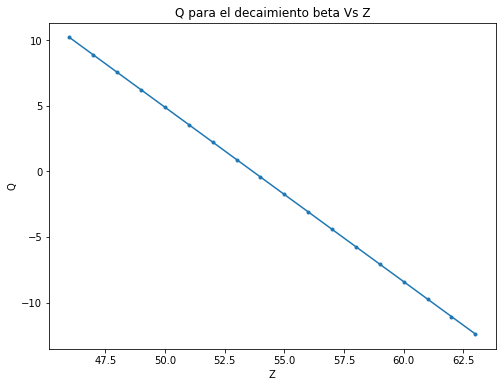

In [ ]:
a = alpha
b = beta
c = gamma

#zz es la lista de isobaros con A = 131

Q = []
for i in (zz):
  y = 71.39 - 1.33 * i

  Q.append(y)

f = plt.figure(figsize=(8, 6))
ax1 = f.add_subplot(1, 1, 1)

ax1.set_title('Q para el decaimiento beta Vs Z')
ax1.set_xlabel('Z')
ax1.set_ylabel('Q')
ax1.plot(zz, Q, '.-')




Usar los parámetros locales para calcular $Z_{A}$, la carga correspondiente al isóbaro A = 131 más estable hipotético

De la teoría sabemos que

$$Z_{A} = \frac{\beta}{-2\gamma}$$
 reemplazando los valores encontrados

$$Z_{A} = \frac{0.071795}{1.3*10^{-3}} = 54.3$$

Use los parámetros locales para predecir el $Q_{\beta-}$ para $^{131}Sb$ y $^{131}La$

In [ ]:
def Q(Z):
  return -1.397 *Z+ 75.450

def Q2(Z):
  return -(2*gamma*Z)-beta-gamma


print('Q(Z=51) = ', Q(51), 'MeV')
print('Q(Z=57) = ', Q(57), 'MeV')


Q(Z=51) =  4.203000000000003 MeV
Q(Z=57) =  -4.179000000000002 MeV


para Z = 51 (Sb) y para Z = 57 (La),

Teniendo en cuenta que $Z_{A} = 54$, luego $Z > Z_{A}$. Esto indica que el isótopo $^{131} La$ es inestable en captura de electrones.

Para el $^{238}U$ tenemos que

In [ ]:
alpha1 = 15.48   # MeV
alpha2 = 17.23   # MeV
alpha3 = 0.697   # MeV
alpha4 = 22.6    # MeV
A = 238
Z = 92
N = A-Z
print('BE = ',alpha1 * A - alpha2 * A ** (2/3) -alpha3 * Z ** 2 / A ** (1/3) - alpha4 * (N - Z) ** 2 / A)

BE =  1793.6748118515418
